<a href="https://colab.research.google.com/github/AbhiramBorra/FakeYelpReviewsDetection/blob/main/Copy_of_YelpReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
'''
We are integrating the Google Drive into the Colab environment system.
'''
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
'''

Importing popular Python libraries including pandas, numpy, matplotlib.pyplot, seaborn, etc
for data analysis

'''

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import pylab as pl
from sklearn.model_selection import train_test_split
from pandas import *
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [55]:

'''

In this section, we load, preprocess and store a CSV file dataset
We use the pd.read_csv() function so that the program subsequently reads the CSV file

Finally, use the df.head() approach to produce an additional DataFrame
containing the specified number of rows from the top

'''

# load csv
df = pd.read_csv
df = pd.read_csv("/content/drive/Shareddrives/ECS 171 Group Project/Labelled Yelp Dataset.csv")
df = df.drop(columns = ['User_id', 'Product_id', 'Date'])  # Drop uneeded columns
df['Label'].replace([-1], [0], inplace=True)
df = df.rename(columns={"Label" : "Real"})  # Rename column
df.head()

,Rating,Review,Real
0,3,The food at snack is a selection of popular Gr...,0
1,3,This little place in Soho is wonderful. I had ...,0
2,4,ordered lunch for 15 from Snack last Friday. Â...,0
3,4,This is a beautiful quaint little restaurant o...,0
4,4,Snack is great place for a Â casual sit down l...,0


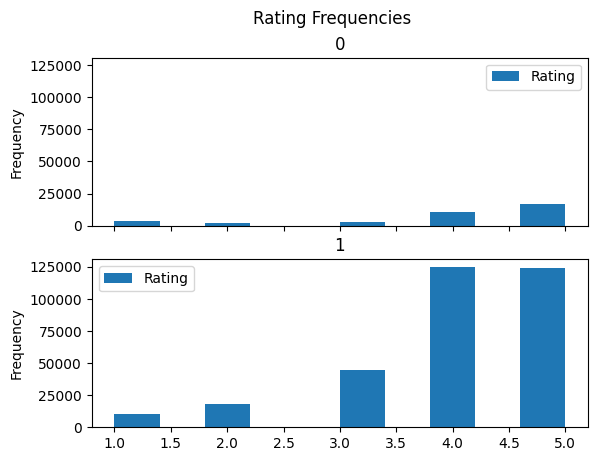

In [56]:
'''

In this section, Using several libraries for data visualization,
we are building a histogram of data in the dataframe by employing the df.plot() method

We additionally apply parameters that satisfy the specifications of a suitable histogram,
which consists of separate plots for each group on the x and y axes,
as well as title of "Rating Frequencies" for fake and real reviews in the graph

'''

# Histogram

'''

Creating dataframe named histo_df

'''
histo_df = df
hist = df.plot(kind="hist", by="Real", subplots=True, sharex=True, sharey=True, title="Rating Frequencies")

<ipython-input-57-1f980702d571>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = cmap, annot = True, vmin = -1, vmax = 1, center = 0)


'\n\nUpon execution, the function displays the heatmap on the screen.\n\n'

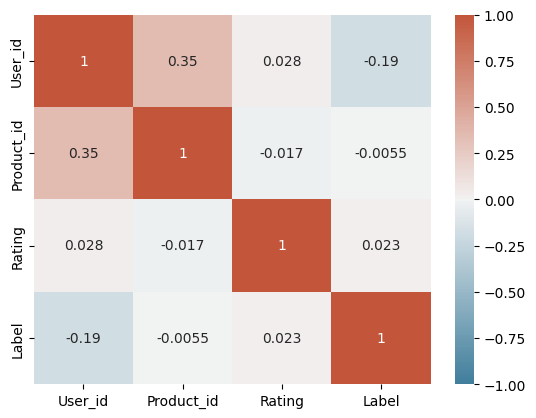

In [57]:
'''

This reads a CSV file into the pandas DataFrame and plots a heatmap of the correlation matrix
using the sns.heatmap() function

'''

# Matrix

'''

We use the pd.read_csv() function which takes the path of the CSV file
as an argument and returns a DataFrame object

We then assign the DataFrame object to a variable called df
in order to access or modify the data


'''
df = pd.read_csv("/content/drive/Shareddrives/ECS 171 Group Project/Labelled Yelp Dataset.csv")

'''

In this case, we are using the Seaborn library to create a heatmap of the correlation matrix of a DataFrame
It also creates a color palette using the sns.diverging_palette() function which are used to display data visually

'''

# plots a heatmap
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), cmap = cmap, annot = True, vmin = -1, vmax = 1, center = 0)

# non much useful informaiton found from the raw data, since they are pure text, need more study, like tf-idf to show the data in numbers.

'''
df.corr():  a method that calculates the correlation matrix of the DataFrame df.
A correlation value where -
-1 means a perfect negative relationship
0 means no relationship,
1 means a perfect positive relationship.

Cmap : color map argument that tells the function what colors to use for the heatmap.
In this case it uses the palette object thaw we created before.

annot : is a  boolean argument that tells the function whether to show the values on the heatmap or not.

vmin meaning the minimum value for the color scale.
Here, vmin = -1 means that any value below -1 will be shown with the same color as -1.

vmax meaning the maximum value for the color scale.
Here, vmax = 1 means that any value above 1 will be shown with the same color as 1.

Center meaning the center value for the color scale.
Here, our center = 0 means that any value equal to 0 will be shown with a neutral color.

'''



'''

Upon execution, the function displays the heatmap on the screen.

'''

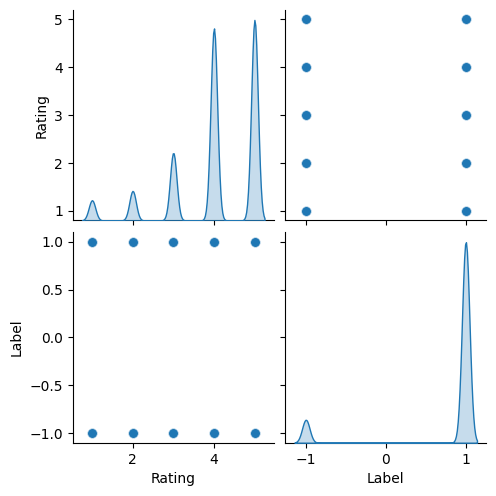

In [58]:
'''

Reads a CSV file to a pandas DataFrame

'''

# Load data set
df = pd.read_csv('/content/drive/Shareddrives/ECS 171 Group Project/Labelled Yelp Dataset.csv')


'''

We assign a DataFrame object to a variable

'''

# Drop non numerical data to create scatter plots
df = df.drop(columns = ['User_id', 'Product_id', 'Date'])


'''
We create a pairplot to display multiple scatter plots in a grid.

We use the sns.pairplot() method to build a pairplot that depicts the paired relationships
between variables in the DataFrame.

We also take arguments that determine the characteristics of the pairplot,
which includes the data itself, the kind of plot, the format and appearance of the plot, etc.

'''
# Create pairplot to show all scatter plots
sns.pairplot(df, kind="scatter", plot_kws=dict(alpha=0.5, s=50), diag_kind='kde')



In [59]:
nltk.download()
#step 1: type 'd' , press enter
#step 2: type 'stopwords' , press enter
#step 3: type 'q' , press enter

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [60]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

temp = df[0:5000]

'''


We have carried out numerous text preprocessing processes
on the 'Review' column in the DataFrame df in order to
clean and prepare text data for subsequent analysis

Here, we are first converting all the text to lower case and
removing common english stopwords digits, URL's,
punctuation marks, special characters and several entities
from the 'Review' text

'''

# FOR ---------> REVEIWS
#converts upper case letters to lower case letters
temp['Review'] = temp['Review'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
#removes common words such as (i, before, to, between, then, etc.)
stop = stopwords.words('english')
temp['Review']=temp['Review'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop]))
#removes numbers
temp['Review']=temp['Review'].apply(lambda x: re.sub(r'[0-9]+', '', x))
#removes URLs
temp['Review']=temp['Review'].apply(lambda x: BeautifulSoup(x).get_text())
temp['Review']=temp['Review'].apply(lambda x: re.sub(r'http\S+', '', x))
#removes punctuations
temp['Review']=temp['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

<ipython-input-60-87c43ef58a41>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Review'] = temp['Review'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
<ipython-input-60-87c43ef58a41>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Review']=temp['Review'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop]))
<ipython-input-60-87c43ef58a41>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

# **TF-IDF**

In [61]:
'''

In this particular instance, we use the scikit-learn library's Tfidf Vectorizer class to transform
a set of textual information to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) characteristics

We are creating a class called TfidfVectorizer in order to
convert the text data into TF_IDF characteristics like vectoriaztion

'''

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
reviews_text = vectorizer.fit_transform(temp['Review'])

In [62]:
print(type(reviews_text))

<class 'scipy.sparse._csr.csr_matrix'>


In [63]:
'''

we are transforming the matrix with a sparse structure reviews_text
through an abundant NumPy array by employing a text vectorization approach using TF-IDF and function reviews_text.toarray()

'''

reviews_text_array = reviews_text.toarray()

In [64]:
# Shrink data set
df = df[0:5000]

In [65]:
reviews_text_array.shape

(5000, 19230)

In [66]:
'''

For splitting the data set between training and testing sets, we apply the train_test_split function from the scikit-learn machine learning toolkit

we use reviews_text_array for importing data into a machine learning model
Every component is a text-based feature for the purpose of classification

With the help of parameters, we specify how to partition the dataset such that 90% of the data
will be used as the training set for training the machine learning model, and 10% of the data will be used to evaluate its performance

'''

train_X,test_X,train_y,test_y = train_test_split(reviews_text_array, temp['Label'], train_size=0.9, random_state=0)  # Split Data

In [67]:
'''%matplotlib inline
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(train_X, train_y)


test_predictions = ridge_model.predict(test_X)
train_predictions = ridge_model.predict(train_X)


from sklearn.model_selection import GridSearchCV
estimator = Ridge()
estimator = Ridge()
param_grid = {"alpha":list(range(1,11))}
model_hp = GridSearchCV(estimator, param_grid, cv = 5)
model_hp.fit(train_X, train_y)


from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(train_X, train_y)

test_predictions = lasso_model.predict(test_X)
train_predictions = lasso_model.predict(train_X)
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(test_y, test_predictions))
test_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)'''

'%matplotlib inline\nfrom sklearn.linear_model import Ridge\n\nridge_model = Ridge()\nridge_model.fit(train_X, train_y)\n\n\ntest_predictions = ridge_model.predict(test_X)\ntrain_predictions = ridge_model.predict(train_X)\n\n\nfrom sklearn.model_selection import GridSearchCV\nestimator = Ridge()\nestimator = Ridge()\nparam_grid = {"alpha":list(range(1,11))}\nmodel_hp = GridSearchCV(estimator, param_grid, cv = 5)\nmodel_hp.fit(train_X, train_y)\n\n\nfrom sklearn.linear_model import Lasso\nlasso_model = Lasso()\nlasso_model.fit(train_X, train_y)\n\ntest_predictions = lasso_model.predict(test_X)\ntrain_predictions = lasso_model.predict(train_X)\nfrom sklearn.metrics import mean_squared_error\ntrain_rmse = np.sqrt(mean_squared_error(test_y, test_predictions))\ntest_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))\nprint("train RMSE:", train_rmse)\nprint("test RMSE:", test_rmse)'

# **NeuralNets**

In [68]:
'''

In this section we are using deep learning library in Python
to creates a model of a neural network in Python using Keras, and analyse it
for binary categorization and a stochastic gradient descent (SGD) optimizer.

'''

from keras.models import Sequential
from keras.layers import Dense

In [69]:
'''
Here we iniatilize the Sequential model for storing the neural network layers
Adding the dense layer with 20 neuron units and use relu function for non linearity
'''
model = Sequential()
model.add(Dense(units = 20, activation = 'relu'))
'''

Adding the hidden dense layer with 75 neuron units

'''
model.add(Dense(units = 75, activation = 'relu'))
'''

Adding the hidden dense layer with 15 neuron units

'''
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
sgdOpt = SGD(learning_rate=0.3)

In [70]:
'''

compling and interpreting the model for binary categorization
and a stochastic gradient descent (SGD) optimizer

'''
model.compile(optimizer=sgdOpt, loss='binary_crossentropy', metrics="accuracy")

In [71]:
'''

Training the machine learning model for 50 epochs on the training data
(train_X and train_y), with 128 samples each group

'''
history = model.fit(train_X, train_y, epochs=50, batch_size=128)

Epoch 1/50
36/36 [==============================] - 2s 22ms/step - loss: 0.5697 - accuracy: 0.8582
Epoch 2/50
36/36 [==============================] - 1s 19ms/step - loss: 0.5541 - accuracy: 0.8787
Epoch 3/50
36/36 [==============================] - 1s 19ms/step - loss: 0.5541 - accuracy: 0.8787
Epoch 4/50
36/36 [==============================] - 1s 20ms/step - loss: 0.5544 - accuracy: 0.8787
Epoch 5/50
36/36 [==============================] - 1s 20ms/step - loss: 0.5488 - accuracy: 0.8787
Epoch 6/50
36/36 [==============================] - 1s 19ms/step - loss: 0.5452 - accuracy: 0.8787
Epoch 7/50
36/36 [==============================] - 1s 19ms/step - loss: 0.5294 - accuracy: 0.8787
Epoch 8/50
36/36 [==============================] - 1s 20ms/step - loss: 0.5209 - accuracy: 0.8787
Epoch 9/50
36/36 [==============================] - 1s 20ms/step - loss: 0.5268 - accuracy: 0.8787
Epoch 10/50
36/36 [==============================] - 1s 19ms/step - loss: 0.4912 - accuracy: 0.8442
Epoch 11/

In [72]:
'''

Predicting the outputs for both the training data (train_X) and the test data (test_X)

'''
# Evaluate Model
train_yhat = model.predict(train_X, verbose = 0)
test_yhat = model.predict(test_X, verbose = 0)

'''

Implementing a threshold value to the predicted values (train_yhat and test_yhat)
to convert them into binary values (0 or 1) for further analysis

'''
# Apply threshold to y_hat
train_yhat_threshold = np.where(train_yhat > 0.5, 1, 0)  # Convert predictions to 1's or 0's
train_yhat_threshold = pd.DataFrame(train_yhat_threshold, columns = ["Real"])  # Convert from numpy to pandas

# Apply threshold to y_hat
test_yhat_threshold = np.where(test_yhat > 0.5, 1, 0)  # Convert predictions to 1's or 0's
test_yhat_threshold = pd.DataFrame(test_yhat_threshold, columns = ["Real"])  # Convert from numpy to pandas

'''

Calculating the Mean Squared Error (MSE) between the true labels (train_y and test_y)
and the predicted labels (train_yhat_threshold and test_yhat_threshold)
Then we are printing the training MSE and testing MSE in order
to evaluate the performance of the model on both datasets

'''
# Output MSE of model
train_mse = mean_squared_error(train_y, train_yhat_threshold)
test_mse = mean_squared_error(test_y, test_yhat_threshold)
print("Training MSE: " + str(train_mse))
print("Testing MSE: " + str(test_mse))

Training MSE: 0.48533333333333334
Testing MSE: 0.4


---------


In [73]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [74]:
def create_model(num_layers, num_nodes, activation_func, optimizer):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=train_X.shape[1], activation=activation_func))

    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation=activation_func))

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [75]:
model = KerasClassifier(build_fn=create_model, verbose=0)


<ipython-input-75-7b0f05354f25>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [76]:
param_grid = {
    'num_layers': [2, 3],
    'num_nodes': [64, 128],
    'activation_func': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop']
}

In [77]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [78]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=cv, verbose=1)

In [79]:
grid_result = grid.fit(train_X, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
29/29 [==============================] - 0s 8ms/step


In [80]:
print("Best Parameters: ", grid_result.best_params_)
print("Best F1 Score: {:.4f}".format(grid_result.best_score_))


Best Parameters:  {'activation_func': 'tanh', 'num_layers': 3, 'num_nodes': 128, 'optimizer': 'rmsprop'}
Best F1 Score: 0.9355


In [81]:
best_model = grid_result.best_estimator_

In [82]:
test_predictions = best_model.predict(test_X)
test_f1_score = f1_score(test_y, test_predictions)
print("F1 Score on Test Data: {:.4f}".format(test_f1_score))


16/16 [==============================] - 0s 10ms/step
F1 Score on Test Data: 0.9484


In [109]:
# Make it so that 0 corresponds to fake review instead of -1
test_y[test_y == -1] = 0
test_predictions[test_predictions == -1] = 0

In [110]:
from sklearn.metrics import classification_report
report = classification_report(test_y, test_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.90      1.00      0.95       450

    accuracy                           0.90       500
   macro avg       0.95      0.51      0.49       500
weighted avg       0.91      0.90      0.86       500



# **Hyperparameter Tuning**

In [111]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create your Keras model
def create_model(num_layers, num_nodes, activation_func, optimizer):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=train_X.shape[1], activation=activation_func))

    for _ in range(num_layers - 1):
        model.add(Dense(num_nodes, activation=activation_func))

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid to search
param_grid = {
    'num_layers': [2, 3],            # Number of hidden layers
    'num_nodes': [64, 128],          # Number of nodes per hidden layer
    'activation_func': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, verbose=1)

# Fit the grid search to your data
grid_result = grid.fit(train_X, train_y)

# Print the best hyperparameters and the corresponding F1 score
print("Best Parameters: ", grid_result.best_params_)
print("Best F1 Score: {:.4f}".format(grid_result.best_score_))

# Access the best estimator (Keras model)
best_model = grid_result.best_estimator_

# Evaluate the best model on your test data
test_predictions = best_model.predict(test_X)
test_f1_score = f1_score(test_y, test_predictions)
print("F1 Score on Test Data: {:.4f}".format(test_f1_score))

<ipython-input-111-b026cc548e1d>:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
47/47 [==============================] - 1s 12ms/step
Best Parameters:  {'activation_func': 'tanh', 'num_layers': 3, 'num_nodes': 128, 'optimizer': 'adam'}
Best F1 Score: 0.9355
16/16 [==============================] - 0s 7ms/step
F1 Score on Test Data: 0.9474


In [116]:
from sklearn.model_selection import cross_validate

Defining a 10-fold cross-validation method
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_validate(grid.bestestimator, X, y, scoring='f1', cv=cv)
CV = cross_validate(grid.bestestimator, X, y, cv=10, scoring=['f1', 'neg_mean_squared_error'])
print('The f1 score and MSE values during each iteration of the cross validation is as follows - ')
print('Most Optimal f1 Score')
print(CV['test_f1_score'])
print('MSE')
print(-1CV['test_neg_mean_squared_error'])

print('\nThe overall optimal f1 score and MSE value is as follows -')
print('Optimal F1 score = ', sum(CV['test_f1_score']) / len(CV['test_f1_score']))
print('Average MSE = ', sum(-1 CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

NameError: ignored